Text(0, 0.5, 'y')

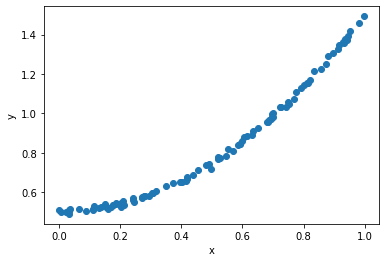

In [21]:
import torch

torch.manual_seed(0)

def generate_data(num_points=100, a=1, b=0.5, noise_factor=0.01):
    data_x = torch.rand((1, num_points))
    noise = torch.randn((1, num_points)) * noise_factor
    data_y = a * data_x.square() + b + noise
    return data_x, data_y

data_x, data_y = generate_data()

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(data_x, data_y)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [22]:
import theseus as th

x = th.Variable(data_x, name='x')
y = th.Variable(data_y, name='y')

a = th.Vector(1, name='a')
b = th.Vector(1, name='b')

In [23]:
def quad_error_fn(optim_vars, aux_vars):
    a, b = optim_vars
    x, y = aux_vars
    est = a.data * x.data.square() + b.data
    err = y.data - est
    return err

optim_vars = a, b
aux_vars = [x, y]
cost_function = th.AutoDiffCostFunction(
        optim_vars, quad_error_fn, 100, aux_vars=aux_vars, name="quad_cost_fn"
)

objective = th.Objective()
objective.add(cost_function)
optimizer = th.GaussNewton(
        objective,
        max_iterations = 10,
        step_size=0.5,
)
theseus_optim = th.TheseusLayer(optimizer)

In [24]:
theseus_inputs = {
"x": data_x,
"y": data_y,
"a": 2 * torch.ones((1, 1)),
"b": torch.ones((1, 1))
}
with torch.no_grad():
    updated_inputs, info = theseus_optim.forward(theseus_inputs, track_best_solution=True, verbose=True)
print("Best solution:", info.best_solution)

Nonlinear optimizer. Iteration: 0. Error: 38.42743682861328
Nonlinear optimizer. Iteration: 1. Error: 9.609884262084961
Nonlinear optimizer. Iteration: 2. Error: 2.405491828918457
Nonlinear optimizer. Iteration: 3. Error: 0.6043925285339355
Nonlinear optimizer. Iteration: 4. Error: 0.15411755442619324
Nonlinear optimizer. Iteration: 5. Error: 0.04154873266816139
Nonlinear optimizer. Iteration: 6. Error: 0.013406438753008842
Nonlinear optimizer. Iteration: 7. Error: 0.006370890885591507
Nonlinear optimizer. Iteration: 8. Error: 0.0046120136976242065
Nonlinear optimizer. Iteration: 9. Error: 0.0041722883470356464
Nonlinear optimizer. Iteration: 10. Error: 0.004062363877892494
Best solution: {'a': tensor([[0.9955]]), 'b': tensor([[0.5022]])}


Text(0, 0.5, 'y')

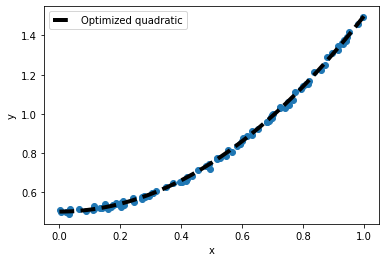

In [25]:
# Plot the optimized function
fig, ax = plt.subplots()
ax.scatter(data_x, data_y);

a = info.best_solution['a'].squeeze()
b = info.best_solution['b'].squeeze()
x = torch.linspace(0., 1., steps=100)
y = a*x*x + b
ax.plot(x, y, color='k', lw=4, linestyle='--',
        label='Optimized quadratic')
ax.legend()

ax.set_xlabel('x')
ax.set_ylabel('y')